EC9630 MACHINE LEARNING - LABORATORY SESSION 3

Task: NONLINEAR MODELS

Name: LOKUVITHANA S M

Reg No: 2021/E/138

Date: 08/03/2025

Time: 10.00 AM

In [ ]:
#Step 01: Download the ‘CDC Diabetes Health Indicators’ data from the UCI machine learning data repository
#Uploaded the dataset manually to the Google Colab as the download link was not working.
import pandas as pd

#Step 02: Read the data as a CSV file
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
print(df.head())    # Display the first few rows and basic information about the dataset
print(df.info())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [ ]:
#Step 03: Handle missing values and categorical variables appropriately
print(df.isnull().sum())          # Check for missing values
for column in df.columns:         # Check data types and unique values in each column
    print(f"{column}: {df[column].dtype}, Unique values: {df[column].nunique()}")

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_binary: float64, Unique values: 2
HighBP: float64, Unique values: 2
HighChol: float64, Unique values: 2
CholCheck: float64, Unique values: 2
BMI: float64, Unique values: 84
Smoker: float64, Unique values: 2
Stroke: float64, Unique values: 2
HeartDiseaseorAttack: float64, Unique values: 2
PhysActivity: float64, Unique values: 2
Fruits: float64, Unique values: 2
Veggies: float64, Unique values: 2
HvyAlcoh

In [ ]:
#Step 04: Encode categorical variables using suitable techniques such as one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns # Identify categorical columns
le = LabelEncoder()                                                # Apply Label Encoding to categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
#Step 05: Divide the dataset into Input (X) and Target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [ ]:
#Step 06: Create the training, validation and test datasets separately. (Use 70%, 20%, 10% respectively)
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)             # First split: 80% train+val, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42) # Second split: 70% train, 10% val (0.125 = 10/80)
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (177576, 21)
Validation set shape: (25368, 21)
Test set shape: (50736, 21)


In [ ]:
#Step 07: Fit a nonlinear model using Radial Basis Functions (RBF) on the training data
import numpy as np
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
rbf_pipeline = Pipeline([                                              # Create RBF pipeline
    ('rbf', RBFSampler(random_state=42)),                              #a. RBF kernel function is implemented
    ('sgd', SGDClassifier(max_iter=1000, random_state=42))             #b. The model is trained using Stochastic Gradient Descent (SGD)
])
param_grid = {                                                         #c. Set up hyperparameters for tuning
    'rbf__n_components': [50, 100, 200],
    'rbf__gamma': [0.1, 0.5, 1.0],
    'sgd__alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(rbf_pipeline, param_grid, cv=5, n_jobs=-1)  # Perform grid search
grid_search.fit(X_train, y_train)
best_rbf_model = grid_search.best_estimator_                           # Get best model
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'rbf__gamma': 0.1, 'rbf__n_components': 50, 'sgd__alpha': 0.0001}
Best score: 0.8605273235896307


In [ ]:
#Step 08: Apply a Perceptron on this training data
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [ ]:
#Step 09: Apply a Multi-Layer Perceptron (MLP) on the training data
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
#b. Implement forward propagation and backpropagation algorithms
mlp = MLPClassifier(random_state=42, max_iter=500, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)
param_dist = {                             #e. Tune hyperparameters such as learning rate, batch size, and number of hidden layers/nodes
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  #a. Design the architecture of the MLP network
    'activation': ['relu', 'tanh'],        #d. Experiment with different activation functions and network structures
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['adaptive'],         #c. Train the model using gradient descent or its variants
    'learning_rate_init': uniform(0.001, 0.1)
}
#e. Tune hyperparameters such as learning rate, batch size, and number of hidden layers/nodes
random_search = RandomizedSearchCV(
    mlp,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)

# Fit the model on a subset of the training data
from sklearn.model_selection import train_test_split
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)
#c. Train the model using gradient descent or its variants
#b. Implement forward propagation and backpropagation algorithms
random_search.fit(X_train_subset, y_train_subset)
best_mlp_model = random_search.best_estimator_   # Get best model
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.0062748150962771655, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.053475643163223785}
Best score: 0.8650493309906744


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RBF Performance:
Accuracy: 0.8621
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Perceptron Performance:
Accuracy: 0.8045
Precision: 0.3452
Recall: 0.4658
F1-score: 0.3965

MLP Performance:
Accuracy: 0.8663
Precision: 0.5831
Recall: 0.1063
F1-score: 0.1799



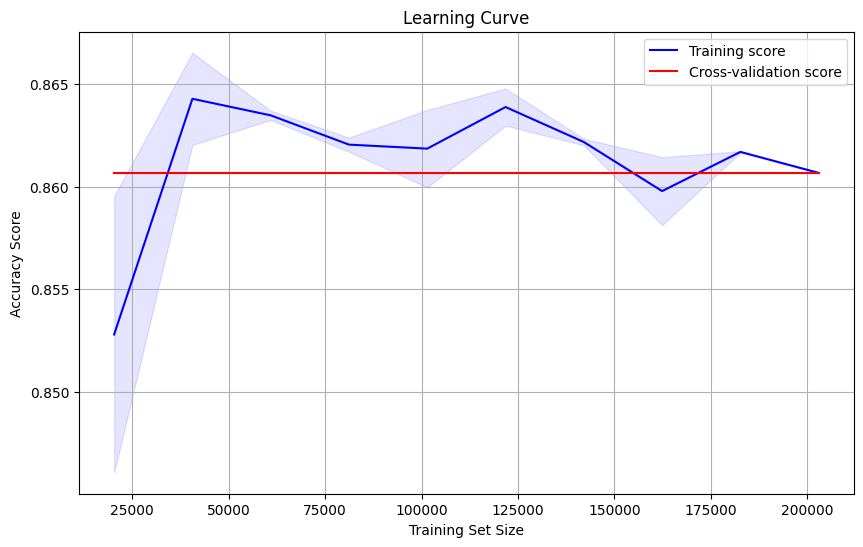

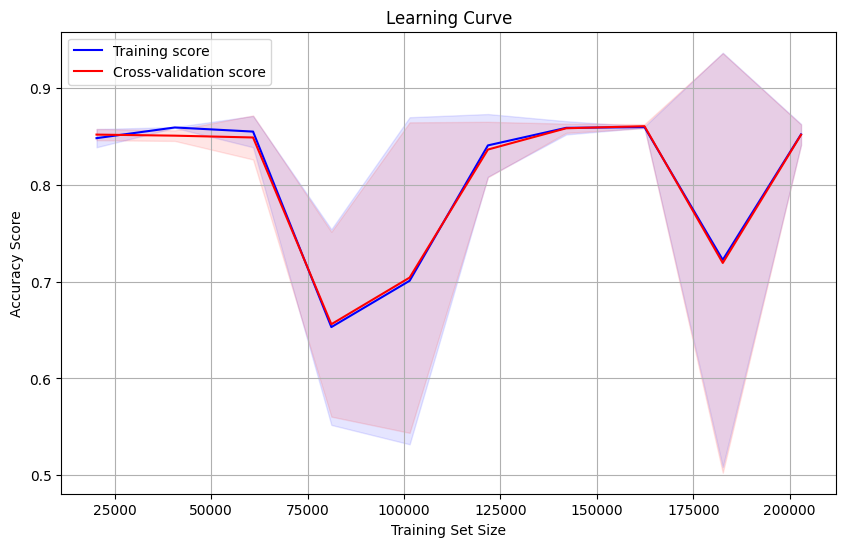

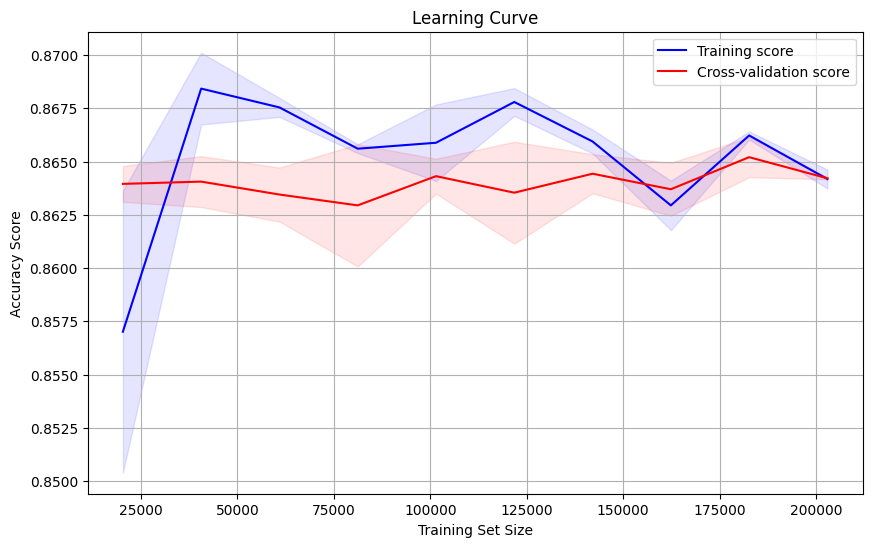

In [ ]:
#Step 10: Evaluate the performance of the nonlinear models on the test data
#a. Compute accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

evaluate_model(best_rbf_model, X_test, y_test, "RBF")        # Evaluate RBF model
evaluate_model(perceptron, X_test, y_test, "Perceptron")     # Evaluate Perceptron
evaluate_model(best_mlp_model, X_test, y_test, "MLP")        # Evaluate MLP
def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1):   #b. Plot learning curves
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="b")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
    plt.plot(train_sizes, val_mean, label="Cross-validation score", color="r")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="r")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve(best_rbf_model, X, y)                    # Plot learning curves for each model
plot_learning_curve(perceptron, X, y)
plot_learning_curve(best_mlp_model, X, y)

Comparison of Model Performance:
            Accuracy  Precision  Recall  F1-score
Model                                            
LAB 01        0.8472     0.8173  0.8472    0.8013
RBF           0.8621     0.0000  0.0000    0.0000
Perceptron    0.8045     0.3452  0.4658    0.3965
MLP           0.8663     0.5831  0.1063    0.1799


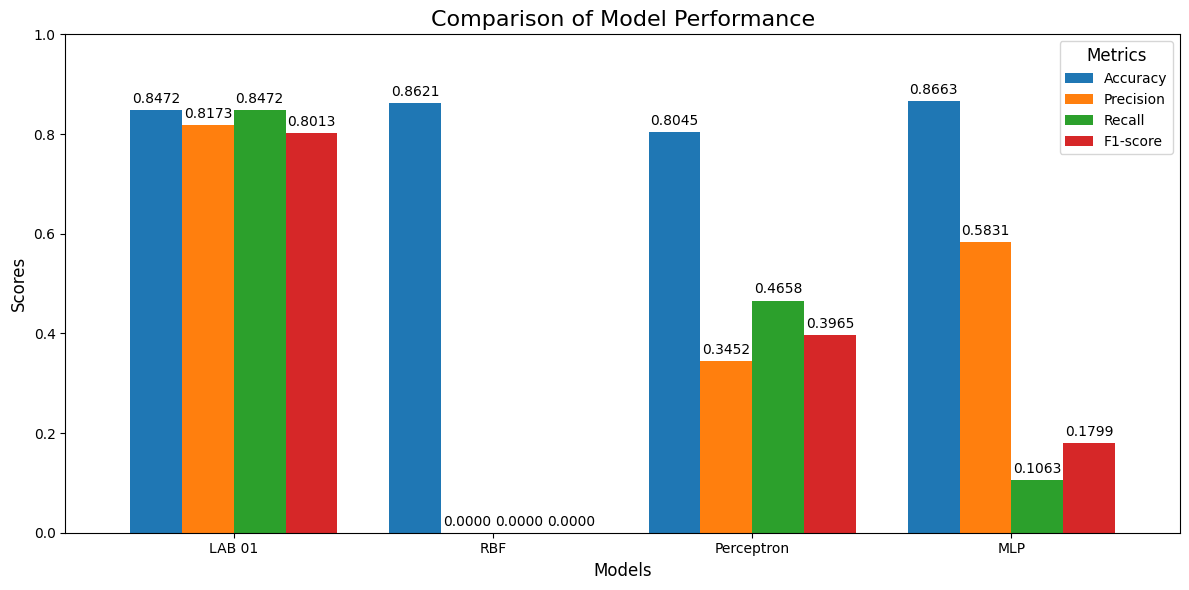


Best model for each metric:
Accuracy: MLP (Score: 0.8663)
Precision: LAB 01 (Score: 0.8173)
Recall: LAB 01 (Score: 0.8472)
F1-score: LAB 01 (Score: 0.8013)

Average performance across all metrics:
LAB 01: 0.8282
Perceptron: 0.5030
MLP: 0.4339
RBF: 0.2155


In [29]:
#Step 11: Compare the previous lab results with nonlinear model results
import pandas as pd
import matplotlib.pyplot as plt
results = {                                               # Create a dictionary with the results
    'Model': ['LAB 01', 'RBF', 'Perceptron', 'MLP'],
    'Accuracy': [0.8472, 0.8621, 0.8045, 0.8663],
    'Precision': [0.8173, 0.0000, 0.3452, 0.5831],
    'Recall': [0.8472, 0.0000, 0.4658, 0.1063],
    'F1-score': [0.8013, 0.0000, 0.3965, 0.1799]
}
df = pd.DataFrame(results)                                # Create a DataFrame
df.set_index('Model', inplace=True)                       # Set 'Model' as the index
print("Comparison of Model Performance:")                 # Print the comparison table
print(df)
ax = df.plot(kind='bar', figsize=(12, 6), width=0.8)      # Create a bar plot
plt.title('Comparison of Model Performance', fontsize=16) # Customize the plot
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend(title='Metrics', title_fontsize='12', fontsize='10')
plt.ylim(0, 1)                                            # Set y-axis limit from 0 to 1
for container in ax.containers:                           # Add value labels on the bars
    ax.bar_label(container, fmt='%.4f', padding=3)
plt.xticks(rotation=0)                                    # Rotate x-axis labels for better readability
plt.tight_layout()                                        # Adjust layout to prevent cutting off labels
plt.show()                                                # Show the plot
best_models = df.idxmax()                                 # Calculate and print the best model for each metric
print("\nBest model for each metric:")
for metric, model in best_models.items():
    print(f"{metric}: {model} (Score: {df.loc[model, metric]:.4f})")
df['Average'] = df.mean(axis=1)                           # Calculate and print the average performance across all metrics for each model
print("\nAverage performance across all metrics:")
for model, avg_score in df['Average'].sort_values(ascending=False).items():
    print(f"{model}: {avg_score:.4f}")

Kaggle Learn - https://www.kaggle.com/learn

Pandas Tutorial - https://pandas.pydata.org/docs/getting_started/intro_tutorials/

Data Cleaning - https://www.kaggle.com/learn/data-cleaning

Data Visualization - https://www.kaggle.com/learn/data-visualization

Normalization & Standardization - https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Multi-Layer Perceptron (MLP) - https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Hyperparameter Tuning - https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

Evaluation Score - https://scikit-learn.org/stable/modules/model_evaluation.html

TensorFlow - https://www.tensorflow.org/learn

PyTorch - https://pytorch.org/tutorials/